## Using APIs to get data from the Web | Example: Using Twitter API to retrieve data & store data in S3

In [32]:
import pandas as pd

In [15]:
#we get this directly from Postman
import requests
import pandas as pd

bearer_token = os.environ.get('BEARER_TOKEN')

headers = {"Authorization": "Bearer {}".format(bearer_token)}

payload={}

## Tweets

In [26]:
url = "https://api.twitter.com/2/tweets/search/recent?query=harry+styles"
tweets = requests.request("GET", url, headers=headers).json()

In [27]:
tweets['data'][:2]

[{'edit_history_tweet_ids': ['1622475713059205120'],
  'id': '1622475713059205120',
  'text': 'RT @upblissed: aint never heard someone say “ayo turn on that new harry styles”'},
 {'edit_history_tweet_ids': ['1622475712891437056'],
  'id': '1622475712891437056',
  'text': 'RT @sunfflouwerry: harry styles                harry styles\nat 23                           at 29 https://t.co/80fFR9Cav7'}]

In [34]:
tweets_data = pd.json_normalize(tweets['data'])

In [40]:
tweets_data.shape

(10, 3)

In [38]:
tweets_data.head(10)['text'].values

array(['RT @upblissed: aint never heard someone say “ayo turn on that new harry styles”',
       'RT @sunfflouwerry: harry styles                harry styles\nat 23                           at 29 https://t.co/80fFR9Cav7',
       "RT @RecordingAcad: Congrats Best Pop Vocal Album winner - 'Harry's House' @Harry_Styles #GRAMMYs https://t.co/15ex1a6OCw",
       'RT @kevinjonas: Well deserved @Harry_Styles what a year!',
       'RT @tswifterastour: 🚨| Taylor Swift and Harry Styles at the 2023 #GRAMMYs! https://t.co/vwj2n3dEyH',
       'RT @bbyonIyangeI: 3 TIME GRAMMY AWARD WINNING NO COLLABS NO REMIXES NO RE-RECORDINGS 3 ALBUMS 35 SONGS HARRY STYLES',
       'RT @marley_ok: Álbum del Año @Harry_Styles 👋👋👋 https://t.co/j77Tg6tnj5',
       'RT @TheSwiftSociety: 📸| Taylor Swift and Harry Styles chatting at the Grammys https://t.co/o99tl6Qno3',
       'RT @sunfflouwerry: harry styles                harry styles\nat 23                           at 29 https://t.co/80fFR9Cav7',
       'RT @PopBas

## Tweet Count

In [28]:
tags = ['harry styles', 'taylor swift', 'beyonce']
tag = 'harry styles'

url = "https://api.twitter.com/2/tweets/counts/recent?query="+tag

response = requests.request("GET", url, headers=headers, data=payload)
tweet_count = response.json()

In [41]:
tweet_count['data'][0:2]

[{'end': '2023-01-30T07:00:00.000Z',
  'start': '2023-01-30T06:02:14.000Z',
  'tweet_count': 5679},
 {'end': '2023-01-30T08:00:00.000Z',
  'start': '2023-01-30T07:00:00.000Z',
  'tweet_count': 4602}]

In [43]:
tweet_count = pd.json_normalize(tweet_count['data'])

In [45]:
tweet_count.tail()

,end,start,tweet_count
164,2023-02-06T03:00:00.000Z,2023-02-06T02:00:00.000Z,112962
165,2023-02-06T04:00:00.000Z,2023-02-06T03:00:00.000Z,66506
166,2023-02-06T05:00:00.000Z,2023-02-06T04:00:00.000Z,164383
167,2023-02-06T06:00:00.000Z,2023-02-06T05:00:00.000Z,92292
168,2023-02-06T06:02:14.000Z,2023-02-06T06:00:00.000Z,1985


In [46]:
tweet_count['query'] = tag

In [47]:
tweet_count['date'] = tweet_count['end'].str[:10]

In [49]:
tweet_count.head()

,end,start,tweet_count,query,date
0,2023-01-30T07:00:00.000Z,2023-01-30T06:02:14.000Z,5679,harry styles,2023-01-30
1,2023-01-30T08:00:00.000Z,2023-01-30T07:00:00.000Z,4602,harry styles,2023-01-30
2,2023-01-30T09:00:00.000Z,2023-01-30T08:00:00.000Z,3008,harry styles,2023-01-30
3,2023-01-30T10:00:00.000Z,2023-01-30T09:00:00.000Z,2468,harry styles,2023-01-30
4,2023-01-30T11:00:00.000Z,2023-01-30T10:00:00.000Z,2423,harry styles,2023-01-30


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

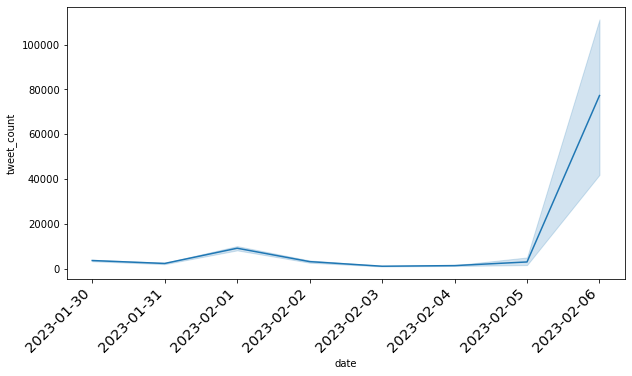

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
ax = sns.lineplot(data=tweet_count, x="date", y="tweet_count")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Get Tweets with text

In [55]:
query = "taylor swift"
url = 'https://api.twitter.com/2/tweets/search/recent?query=' + query + '&max_results=100'

response = requests.request("GET", url, headers=headers, data=payload)
tweet_taylor_swift = response.json()

In [56]:
tweet_taylor_swift

{'data': [{'edit_history_tweet_ids': ['1622477990608228352'],
   'id': '1622477990608228352',
   'text': 'RT @fordhoIden: taylor swift is like the only person who tries to have FUN in a room full of the most famous people on the planet where the…'},
  {'edit_history_tweet_ids': ['1622477990348361734'],
   'id': '1622477990348361734',
   'text': 'RT @TheSwiftSociety: 📸| Taylor Swift and Harry Styles chatting at the Grammys https://t.co/o99tl6Qno3'},
  {'edit_history_tweet_ids': ['1622477988573900801'],
   'id': '1622477988573900801',
   'text': 'RT @heyheedie: Nobody is having a better time at the grammys than taylor swift my step sister hasn’t been seated for a single performance'},
  {'edit_history_tweet_ids': ['1622477988359979009'],
   'id': '1622477988359979009',
   'text': 'RT @PopBase: Taylor Swift is now a 12x #GRAMMYs winner. https://t.co/NaYRgM25D1'},
  {'edit_history_tweet_ids': ['1622477988338991104'],
   'id': '1622477988338991104',
   'text': 'RT @TSwiftNZ: 📸 | Taylor Swif

In [64]:
tweets_taylor = pd.json_normalize(tweet_taylor_swift['data'])

In [65]:
tweets_taylor.shape

(100, 3)

# Storing the data into AWS S3

In [73]:
import os
import boto3

aws_access_key_id = os.environ['aws_access_key_id']
aws_secret_access_key = os.environ['aws_secret_access_key']

In [74]:
# Generate the boto3 client for interacting with S3
s3 = boto3.client('s3', region_name='us-east-1', 
                        # Set up AWS credentials 
                        aws_access_key_id=aws_access_key_id, 
                         aws_secret_access_key=aws_secret_access_key)

In [78]:
#note that this assumes there is already an existing file name called file_name in the S3 bucket.
from io import StringIO # python3; python2: BytesIO 

    
# Creating the high level object oriented interface
resource = boto3.resource(
    's3',
    aws_access_key_id = aws_access_key_id,
    aws_secret_access_key = aws_secret_access_key
)

In [80]:
from io import StringIO # python3; python2: BytesIO import boto3
import csv

bucket = 'ac-individual-files' # already created on S3
file_name = tag + "_output.csv"
csv_buffer = StringIO()
tweet_count.to_csv(csv_buffer, index = False, encoding='utf-8-sig')

# overwrite
resource.Object(bucket, file_name).put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '7A9SAMANZKA2MD6G',
  'HostId': 'vgcJEFOmBGT83Q6BySo6Zf2+JAUA/h9CPVC9E+iVh1e1XIhYAOQNZjATyzOYoAu5xdUhTl/xE78=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'vgcJEFOmBGT83Q6BySo6Zf2+JAUA/h9CPVC9E+iVh1e1XIhYAOQNZjATyzOYoAu5xdUhTl/xE78=',
   'x-amz-request-id': '7A9SAMANZKA2MD6G',
   'date': 'Mon, 06 Feb 2023 14:52:56 GMT',
   'etag': '"b09e9f0b214ce161b5d78ed8326ef3f4"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"b09e9f0b214ce161b5d78ed8326ef3f4"'}

# Json Responses

In [82]:
s3.list_objects(Bucket = 'ac-individual-files')

{'ResponseMetadata': {'RequestId': '5RZ8540GMVX27BJM',
  'HostId': 'tyWEzlALMAx0pr0OtLmHPvHytG657ZLPKPTrhyTzIlYzb5P6sM2QHIJsu99gLuUm/50+lJe16xg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'tyWEzlALMAx0pr0OtLmHPvHytG657ZLPKPTrhyTzIlYzb5P6sM2QHIJsu99gLuUm/50+lJe16xg=',
   'x-amz-request-id': '5RZ8540GMVX27BJM',
   'date': 'Mon, 06 Feb 2023 15:46:57 GMT',
   'x-amz-bucket-region': 'us-east-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Marker': '',
 'Contents': [{'Key': 'AAL.csv',
   'LastModified': datetime.datetime(2023, 2, 6, 1, 40, 38, tzinfo=tzutc()),
   'ETag': '"e8e5b6bc6bce8cba416015f3a66b82a8"',
   'Size': 17610,
   'StorageClass': 'STANDARD',
   'Owner': {'DisplayName': 'aacastellanosb',
    'ID': 'fd6235c8b6eb33733441653fcd644ec8c5984b0fce2151a0786b63cd6b2a77db'}},
  {'Key': 'AAPL.csv',
   'LastModified': datetime.datetime(2023, 2, 6, 3, 10, 17, tzinfo=tzutc()

In [1]:
pd.json_normalize(s3.list_objects(Bucket = 'ac-individual-files')['Contents']).head()

NameError: name 'pd' is not defined